In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.interpolate import interp1d
from matplotlib.colors import LogNorm

In [22]:
Mearth = 5.972e27 #g
Msun = 1.989e+33 #g
Lsun_cgs = 3.839e33 #ergs/s
Rsun = 69e9 #cm
EarthtoSun = Mearth/Msun
G = 6.67e-8
sigB = 5.670e-5 #erg/(cm^2 s K^4)

In [72]:
Mdisk_Earth_med = 4e-3 # Mearth
Mdisk_Sun_med = Mdisk_Earth_med*EarthtoSun
Mdisk_Sun_med

1.201005530417295e-08

In [4]:
ptable = pd.read_csv('/Users/eduardo.aguirre_serrata/Documents/GitHub/wedgeford/DiskLibrary/PP7-Surveys_2022-10-19_PPVII_website.csv')
ptable.head()

,Region,Source,2MASS/SSTc2d,RA,Dec,EDR3_plx,EDR3_err_plx,EDR3_dist_pc,EDR3_RUWE,EDR3_Dist_PPVII,...,Mstar_B15_xs_DR3,logMacc_B15_xs_DR3,Mstar_S00_xs_DR3,logMacc_S00_xs_DR3,Mstar_Fei_xs_DR3,logMacc_Fei_xs_DR3,Mstar_PPVII,logMacc_PPVII,notes_Macc_PPVII,dist_PPVII
0,Lupus,Sz65,J15392776-3446171,39:27.8,-34:46:17.577,6.5159,0.0253,153.47,1.417,153.47,...,0.661,-9.516,0.7250,-9.556,0.61,-9.48,0.610,-9.480,<,153.47
1,Lupus,Sz66,J15392828-3446180,39:28.3,-34:46:18.450,6.4134,0.0269,155.92,1.2,155.92,...,0.291,-8.508,0.3125,-8.538,0.31,-8.54,0.291,-8.508,--,155.92
2,Lupus,J15430131-3409153,J15430131-3409153,43:01.3,-34:09:15.400,--,--,--,--,158.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.000,-99.000,--,-99.00
3,Lupus,J15430227-3444059,J15430227-3444059,43:02.3,-34:44:06.200,-0.0997,0.2261,-10030.09,1.018,158.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.000,-99.000,--,-99.00
4,Lupus,J15445789-3423392,J15445789-3423392,44:57.9,-34:23:39.500,6.4956,0.0772,153.95,1.201,153.95,...,0.087,-10.68,0.1000,-10.74,0.09,-10.70,0.087,-10.680,--,153.95


In [8]:
Mstar_ = np.array(ptable.Mstar_PPVII)
Lstar_ = ptable.Lstar_xs_DR3 #erg/s
Teff_ = ptable.Teff_HH14
Mstar_diskII = np.array(ptable[ptable['Disk'] == 'II']['Mstar_PPVII'])



Mstar_clean = []
Lstar_clean = []
Teff_clean = []
Mstar_diskII_clean = []


data_raw = [Mstar_, Mstar_diskII,Lstar_,Teff_]
data_clean = [Mstar_clean, Mstar_diskII_clean,Lstar_clean, Teff_clean]


for raw, clean in zip(data_raw, data_clean):
    for item in raw:
        if str(item).startswith('<'):   #quite a few of the dust values have a "<" so we must get rid of it to turn our values into floats
            item = str(item).strip('<')
        try:
            flitem = float(item)
        except:
            flitem = -99
        clean.append(flitem)
    for index,item in enumerate(clean):
        if np.isnan(item):
            clean[index] = -99

In [10]:
print(np.shape(Lstar_clean), np.shape(Teff_clean))

(891,) (891,)


In [14]:
#Cleaning Cell

Mstar_series = pd.Series(data=Mstar_clean, index=Mstar_clean)
Mstar_clean_clean = np.array(Mstar_series.drop(labels=-99))

Lstar_series = pd.Series(data=Lstar_clean, index=Lstar_clean)
Lstar_clean_clean = np.array(Lstar_series.drop(labels=-99))

Teff_series = pd.Series(data=Teff_clean, index=Teff_clean)
Teff_clean_clean = np.array(Teff_series.drop(labels=-99))

print(np.shape(Lstar_clean_clean), np.shape(Teff_clean_clean))

(550,) (550,)


In [104]:
#Star Radius calculator.
Lstar_cgs = np.array(Lstar_clean_clean*Lsun_cgs)
def Rstar_(Tstar, Lstar):
    T4 = Tstar**4
    denom = np.array(4*math.pi*sigB*T4)
    Rstar_ = (np.sqrt(Lstar/denom))/Rsun
    return Rstar_

T_input = 3500
L_interp = interp1d(Teff_clean_clean, Lstar_cgs)
L_new = np.array(L_interp(T_input))
Rstar_sample = Rstar_(T_input, L_new)

Rstar_sample = Rstar_sample[Rstar_sample < 10]   #ASK HOW TO CONDENSE INTO ONE LINE!
Rstar_sample_clean = Rstar_sample[Rstar_sample > 1.4]



# print('Rstar_a =',Rstar_sample_clean) #for arrays

# Rstar_sample = Rstar_(Teff_clean_clean, Lstar_cgs)
# R_new = Rstar_(3500, L_new)
# print(R_new, L_new)

# print(L_new/Lsun_cgs)

2.8445107405977423


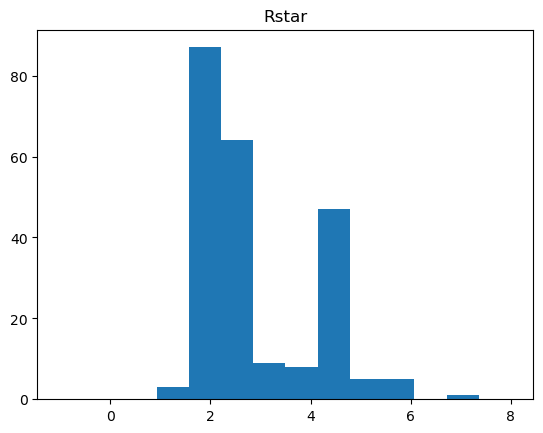

In [62]:
nbins = 15
Rstar_bins = np.linspace(-1,8,nbins) #(0, 2.2)
plt.hist(Rstar_sample_clean, bins=Rstar_bins)
plt.title('Rstar')
print(np.mean(Rstar_sample_clean))